In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    fromHB5Table1,
    implementChannelWidthLimit,
    readHEPDataCsv,
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit, validateChannelWidthLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# ATLAS 13TeV LHC

## `gg > H > WW` [1710.01123](https://arxiv.org/abs/1710.01123)

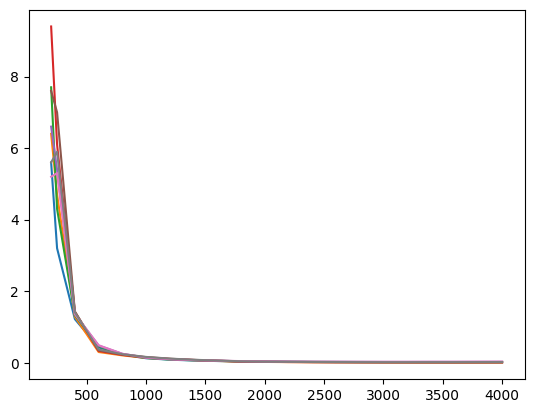

Looks good. Saving this to ggH_LHC13_ATLAS_36.json


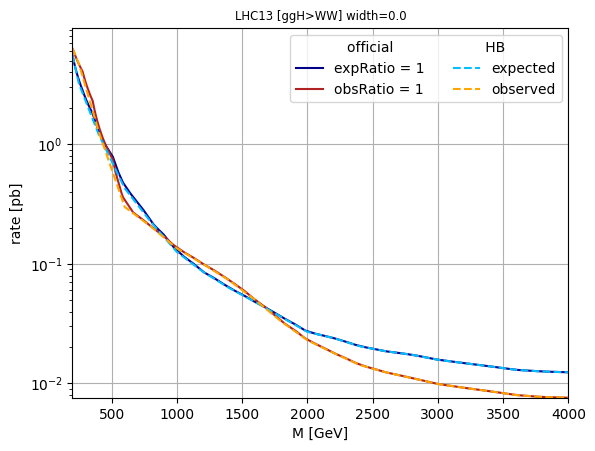

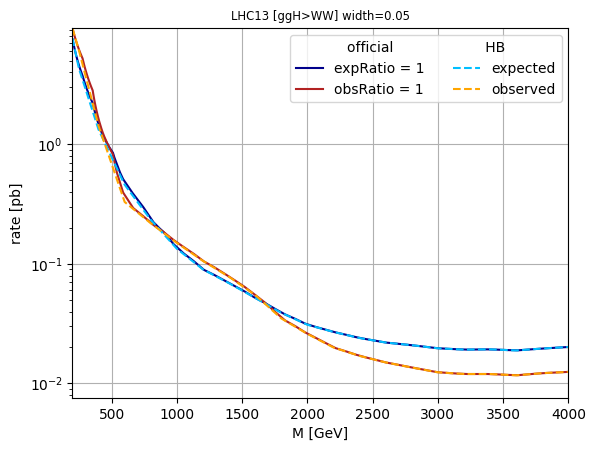

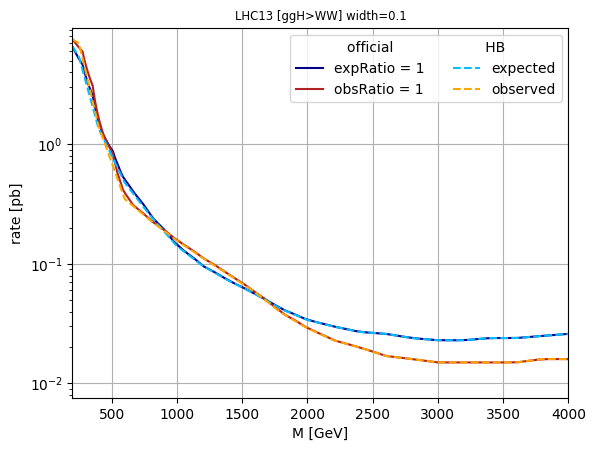

In [2]:
def readWidthTable(url, normWidth):
    dfs = readHEPDataCsv(url)
    limitName = "Upper_limit [pb]"
    if limitName not in list(dfs[0]):
        limitName = "upper_limit [pb]"
    dfs[0].rename(columns={"MT [GeV]": "m", limitName: "obs"}, inplace=True)
    dfs[0]["exp"] = dfs[1][limitName]
    dfs[0]["normWidth"] = normWidth
    return dfs[0]


df = pd.concat(
    [
        readWidthTable(
            "https://www.hepdata.net/download/table/ins1628411/Table%{}/1/csv".format(
                tableNum
            ),
            w,
        )
        for tableNum, w in ((2010, 0.0), (2027, 5e-2), (2028, 10e-2), (2013, 15e-2))
    ]
).set_index(["m", "normWidth"])

# drop the 5 mass datapoints that are only present for the NWA limit
df = df.loc[df.loc[:, 0.05, :].index.get_level_values(0), :, :].reset_index()

limitFile = implementChannelWidthLimit(
    "1710.01123",
    {"channels": [["ggH", "WW"]]},
    "https://doi.org/10.17182/hepdata.79407",
    df,
    massResolution=resolution.WW["2l2nu"],
    idSuffix=1,
)
lim = HB.Limit(limitFile)
validateChannelWidthLimit(lim)


## `vbfH > WW` [1710.01123](https://arxiv.org/abs/1710.01123)

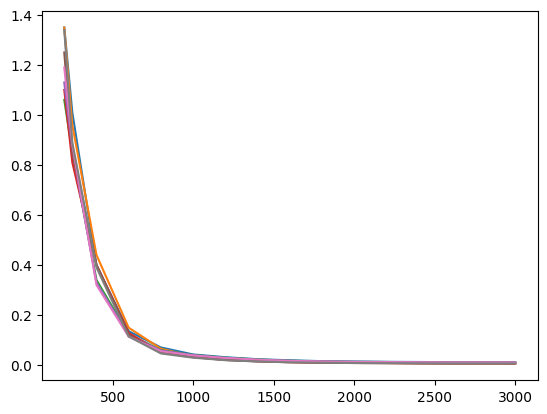

Looks good. Saving this to vbfH_LHC13_ATLAS_36.json


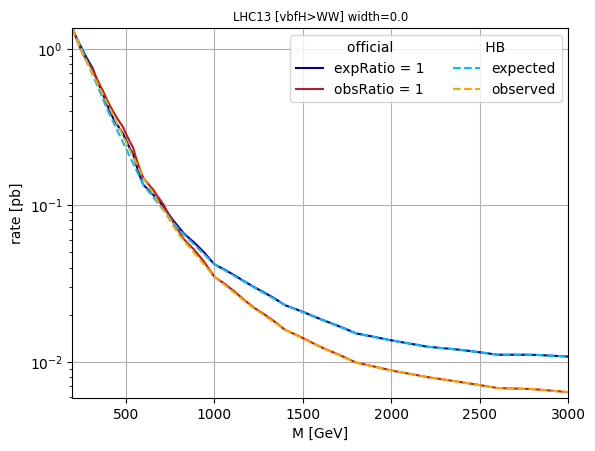

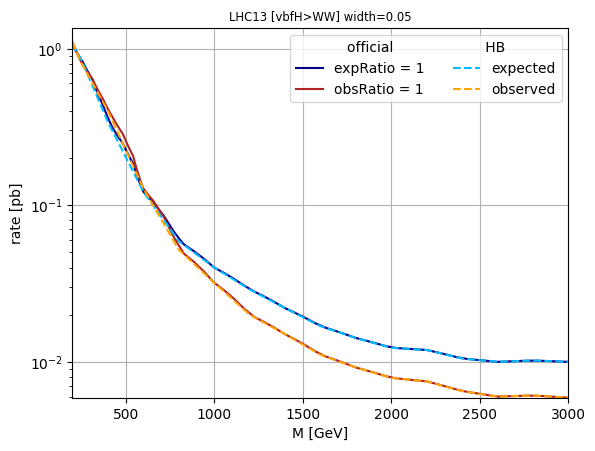

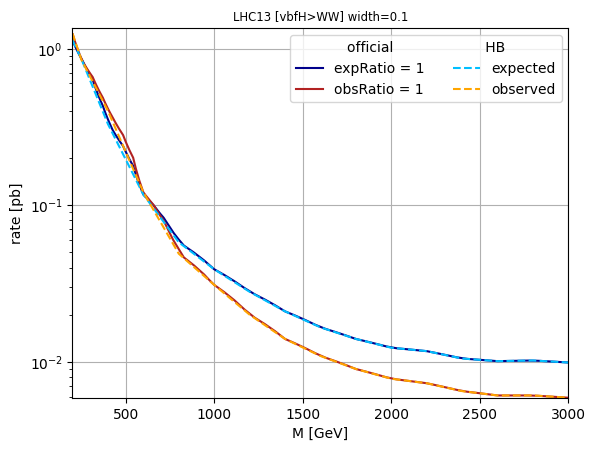

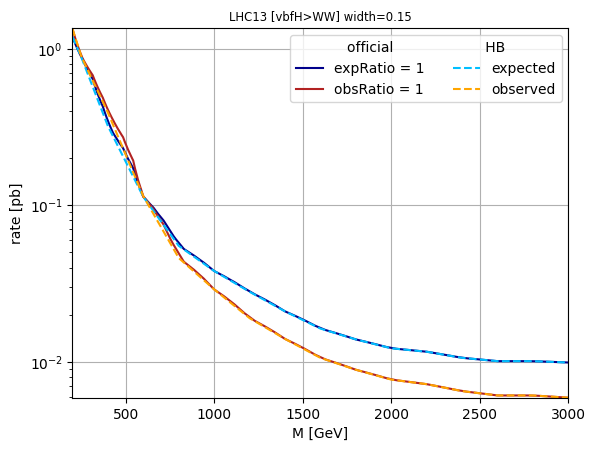

In [3]:
def readWidthTable(url, normWidth):
    dfs = readHEPDataCsv(url)
    limitName = "Upper_limit [pb]"
    if limitName not in list(dfs[0]):
        limitName = "upper_limit [pb]"
    dfs[0].rename(columns={"MT [GeV]": "m", limitName: "obs"}, inplace=True)
    dfs[0]["exp"] = dfs[1][limitName]
    dfs[0]["normWidth"] = normWidth
    return dfs[0]


df = pd.concat(
    [
        readWidthTable(
            "https://www.hepdata.net/download/table/ins1628411/Table%{}/1/csv".format(
                tableNum
            ),
            w,
        )
        for tableNum, w in ((2011, 0.0), (2029, 5e-2), (2030, 10e-2), (2014, 15e-2))
    ]
).set_index(["m", "normWidth"])

# drop the 5 mass datapoints that are only present for the NWA limit
df = df.loc[df.loc[:, 0.05, :].index.get_level_values(0), :, :].reset_index()

limitFile = implementChannelWidthLimit(
    "1710.01123",
    {"channels": [["vbfH", "WW"]]},
    "https://doi.org/10.17182/hepdata.79407",
    df,
    massResolution=resolution.WW["2l2nu"],
    idSuffix=2,
)
lim = HB.Limit(limitFile)
validateChannelWidthLimit(lim)


## `gg > H > WW > lnuqq` [1710.07235](https://arxiv.org/abs/1710.07235)

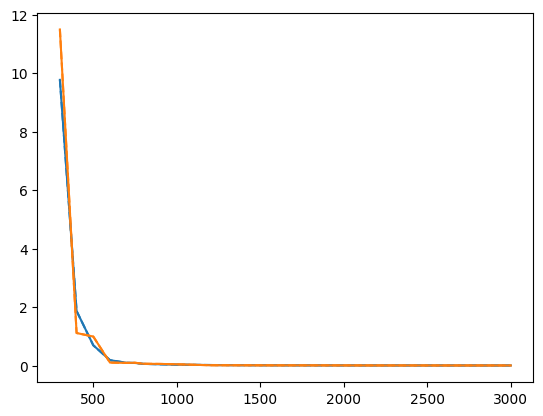

Looks good. Saving this to ggH_qqlnu_LHC13_ATLAS_36.json


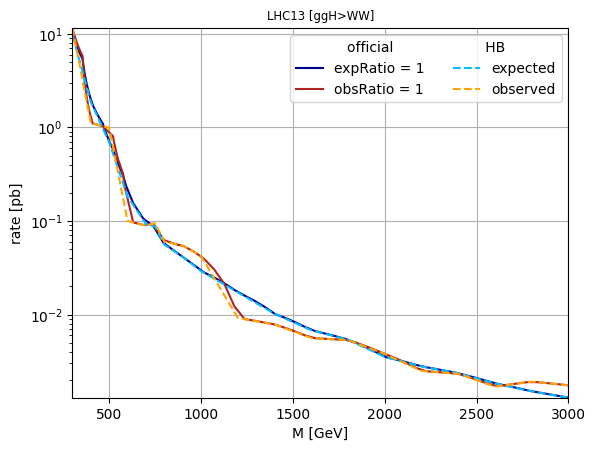

In [4]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1631642/Limit%20model%20%3A%20ggHWWNWA/1/csv"
)

df = dfs[0].rename(
    columns={"Mass [TeV]": "m", "Cross section upper limit at 95% CL [pb]": "obs"}
)
df["exp"] = dfs[1]["Cross section upper limit at 95% CL [pb]"]
df.m *= 1e3
limitFile = implementChannelLimit(
    "1710.07235",
    {"channels": [["ggH", "WW"]]},
    "https://doi.org/10.17182/hepdata.79779.v1/t8",
    df,
    prefix="ggH_qqlnu",
    idSuffix=1,
    massResolution=resolution.WW["qqlnu"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `vbfH > WW > lnuqq` [1710.07235](https://arxiv.org/abs/1710.07235)

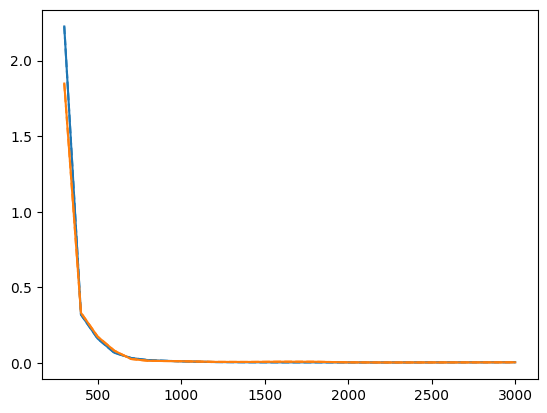

Looks good. Saving this to vbfH_qqlnu_LHC13_ATLAS_36.json


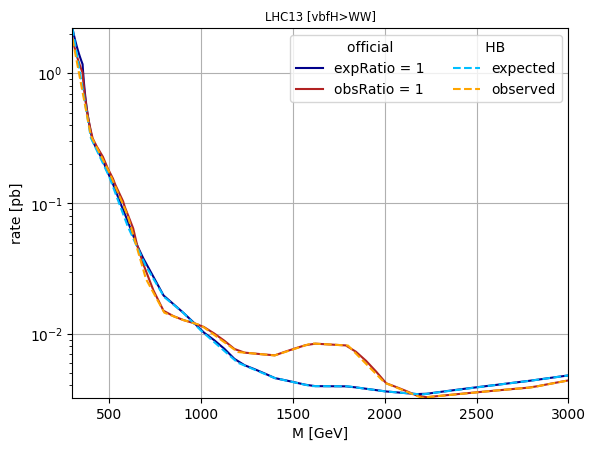

In [5]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1631642/Limit%20model%20%3A%20VBFWWNWA/1/csv"
)

df = dfs[0].rename(
    columns={"Mass [TeV]": "m", "Cross section upper limit at 95% CL [pb]": "obs"}
)
df["exp"] = dfs[1]["Cross section upper limit at 95% CL [pb]"]
df.m *= 1e3
limitFile = implementChannelLimit(
    "1710.07235",
    {"channels": [["vbfH", "WW"]]},
    "https://doi.org/10.17182/hepdata.79779.v1/t7",
    df,
    prefix="vbfH_qqlnu",
    idSuffix=2,
    massResolution=resolution.WW["qqlnu"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# ATLAS 8TeV LHC

## `pp > H > WW` [1509.00389](https://arxiv.org/abs/1509.00389)
We don't implement the finite width interpretations of this analysis, since the normalize to the SM-like Higgs width, leading to very irregular grids.

HB-5 data did not match the paper (probably from older conf note) and was updated.

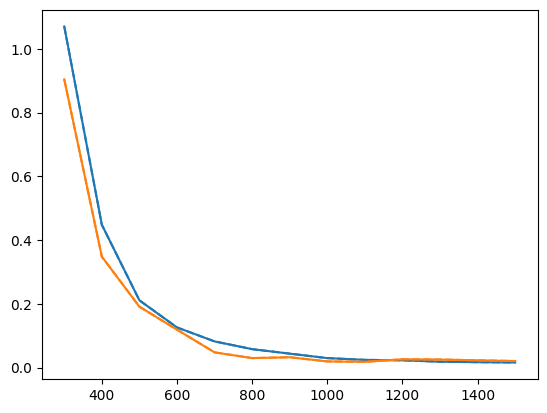

Looks good. Saving this to H_LHC8_ATLAS_20.json


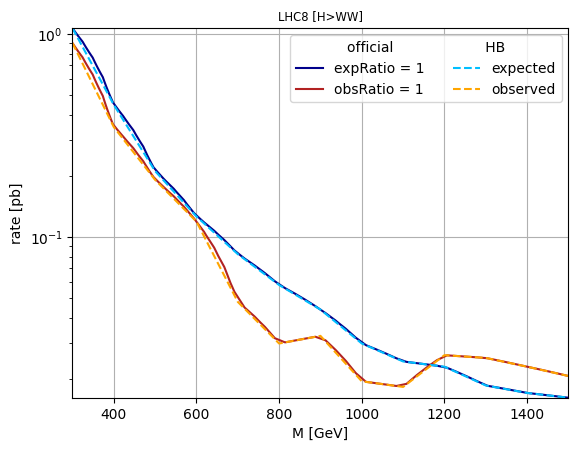

In [6]:
df = pd.DataFrame(
    {
        "m": np.arange(300, 1501, 100),
        "obs": [
            0.904,
            0.348,
            0.191,
            0.119,
            0.0478,
            0.0298,
            0.0325,
            0.0194,
            0.0182,
            0.0261,
            0.0253,
            0.0229,
            0.0206,
        ],
        "exp": [
            1.07,
            0.448,
            0.211,
            0.126,
            0.0822,
            0.0579,
            0.0438,
            0.0298,
            0.0243,
            0.0229,
            0.0185,
            0.0170,
            0.0161,
        ],
    }
)
limitFile = implementChannelLimit(
    "1509.00389",
    {"channels": [["H", "WW"]]},
    "Fig. 13 (left)",
    df,
    idSuffix=1,
    massResolution=resolution.WW["2l2nu"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `vbfH > WW` [1509.00389](https://arxiv.org/abs/1509.00389)
We don't implement the finite width interpretations of this analysis, since the normalize to the SM-like Higgs width, leading to very irregular grids.

HB-5 data did not match the paper (probably from older conf note) and was updated.

Looks good. Saving this to vbfH_LHC8_ATLAS_20.json


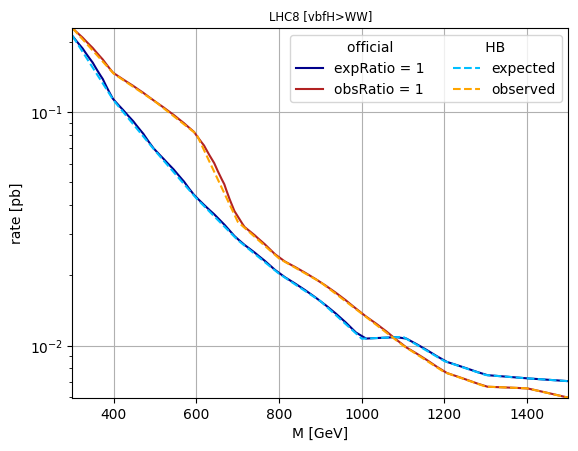

In [7]:
df = pd.DataFrame(
    {
        "m": np.arange(300, 1501, 100),
        "obs": [
            0.229,
            0.146,
            0.111,
            0.0805,
            0.0339,
            0.0236,
            0.0187,
            0.0137,
            0.0100,
            0.00769,
            0.00667,
            0.00656,
            0.00598,
        ],
        "exp": [
            0.212,
            0.112,
            0.0683,
            0.0427,
            0.0283,
            0.0203,
            0.0155,
            0.0107,
            0.0109,
            0.00858,
            0.00748,
            0.00724,
            0.00704,
        ],
    }
)
limitFile = implementChannelLimit(
    "1509.00389",
    {"channels": [["vbfH", "WW"]]},
    "Fig. 13 (right)",
    df,
    idSuffix=2,
    massResolution=resolution.WW["2l2nu"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `pp > H > WW` [1412.2641](https://arxiv.org/abs/1412.2641)

In [8]:
df = fromHB5Table1("2013030_Atlas_H-WW-lnulnu_25fb-1", "ATLAS")

limitFile = implementChannelLimit(
    "1412.2641",
    {"channels": [[p, "WW"] for p in ["H", "vbfH", "HW", "HZ"]]},
    "Fig. 42",
    df,
    massResolution=resolution.WW["2l2nu"],
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    constraints={"modelLike": "SMHiggs", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


Looks good. Saving this to comb_LHC8_ATLAS_25.json
using effective coupling input for SM-normalized limit
